In [1]:
import googletrans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_itm_cat = pd.read_csv('00-Input/item_categories.csv')
df_itm = pd.read_csv('00-Input/items.csv')
df_sh = pd.read_csv('00-Input/shops.csv')
df_tr = pd.read_csv('00-Input/sales_train.csv')
df_te = pd.read_csv('00-Input/test.csv')

## Aim / Goal -> Forcast total amount of products sold for the next month/months

### STEP-1: EDA
- Top 5 records
- Data Types / Info
- Shape Of Data
- Missing Values
- NULL values
- Describe
- Correlation

### STEP-2: Combined data into one dataframe
- Check for duplicates
- Cleaning

### STEP-3: visualization
- Yearly sales
- Monthly sales
- Monthly items count
- Weekly sales

### STEP-4: Outliers
- Identifying
- Handling

### STEP-5: Machine learning
- Data preparation
- Identify Methods for future sales forcasting

In [3]:
print(df_itm_cat.head())
print('')
print(df_itm.head())
print('')
print(df_sh.head())
print('')
print(df_tr.head())
print('')
print(df_te.head())

           item_category_name  item_category_id
0  PC - Headsets / Headphones                 0
1           Accessories - PS2                 1
2           Accessories - PS3                 2
3           Accessories - PS4                 3
4           Accessories - PSP                 4

                                           item_name  item_id  \
0                       ! POWER IN glamor (PLAST.) D        0   
1  ! ABBYY FineReader 12 Professional Edition Ful...        1   
2                           *** In the glory (UNV) D        2   
3                             *** BLUE WAVE (Univ) D        3   
4                                  *** BOX (GLASS) D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  

                           shop_name  shop_id
0  ! Yakutsk Ordzhonikidze, 56 Franc        0
1       ! Yakutsk TC "Central" Franc        1
2                   Adygea TC "Mega"        2
3  

In [4]:
# EDA 

def EDA(df):
    print(" ")
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print(" ")
    print("----------Data Types-----------")
    print(df.dtypes)
    print(" ")
    print("----------INFO-----------------")
    print(df.info())
    print(" ")
    print("-----Data Shape-------------")
    print(df.shape)
    print(" ")
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print(" ")
    print("-------NULL values-------------")
    print(df.isna().sum())
    
    

In [5]:

print("*************** Item Categories ***************")
EDA(df_itm_cat)


*************** Item Categories ***************
 
----------TOP 5 RECORDS--------
           item_category_name  item_category_id
0  PC - Headsets / Headphones                 0
1           Accessories - PS2                 1
2           Accessories - PS3                 2
3           Accessories - PS4                 3
4           Accessories - PSP                 4
 
----------Data Types-----------
item_category_name    object
item_category_id       int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
None
 
-----Data Shape-------------
(84, 2)
 
-------Missing Values----------
item_category_name    0
item_category_id      0
dtype: int64
 
-----

In [6]:
df_itm_cat.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [7]:
print("*************** Items ***************")
EDA(df_itm)

*************** Items ***************
 
----------TOP 5 RECORDS--------
                                           item_name  item_id  \
0                       ! POWER IN glamor (PLAST.) D        0   
1  ! ABBYY FineReader 12 Professional Edition Ful...        1   
2                           *** In the glory (UNV) D        2   
3                             *** BLUE WAVE (Univ) D        3   
4                                  *** BOX (GLASS) D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
 
----------Data Types-----------
item_name           object
item_id              int64
item_category_id     int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  obj

In [10]:
print("*************** Shops ***************")
EDA(df_sh)

*************** Shops ***************
 
----------TOP 5 RECORDS--------
                           shop_name  shop_id
0  ! Yakutsk Ordzhonikidze, 56 Franc        0
1       ! Yakutsk TC "Central" Franc        1
2                   Adygea TC "Mega"        2
3   Balashikha TRC "October-Kinomir"        3
4         Volzhsky mall "Volga Mall"        4
 
----------Data Types-----------
shop_name    object
shop_id       int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
 
-----Data Shape-------------
(60, 2)
 
-------Missing Values----------
shop_name    0
shop_id      0
dtype: int64
 
-------NULL values-------------
shop_name    0
shop_id      0
dtype: int64


In [11]:
print("*************** Training Sales Data ***************")
EDA(df_tr)

*************** Training Sales Data ***************
 
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
 
----------Data Types-----------
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2  

In [12]:
print("*************** Test data ***************")
EDA(df_te)

*************** Test data ***************
 
----------TOP 5 RECORDS--------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
 
----------Data Types-----------
ID         int64
shop_id    int64
item_id    int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
 
-----Data Shape-------------
(214200, 3)
 
-------Missing Values----------
ID         0
shop_id    0
item_id    0
dtype: int64
 
-------NULL values-------------
ID         0
shop_id    0
item_id    0
dtype: int64


In [8]:
# Combining sales_train with item_categories
#df_itm_cat, df_itm, #df_sh, #df_tr
df_tr_itm = pd.merge(left=df_tr, right=df_itm, left_on='item_id', right_on='item_id')
df_tr_itm

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,Scene 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,Scene 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,Scene 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37
...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,ACh vaudeville Vaudeville (rem),40
2935845,01.10.2015,33,25,7903,12198.0,1.0,XBOX 360 S 250GB CONSOLE / KINECT BUNDLE KUNG ...,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,WARHAMMER ACCESSORIES: Khorne Dice art. 65-13,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...,64


In [9]:
df_tr_itm_cat = pd.merge(left=df_tr_itm, right=df_itm_cat, left_on='item_category_id', right_on='item_category_id')
df_tr_itm_cat

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,Scene 2012 (BD),37,Movie - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,Scene 2012 (BD),37,Movie - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,Scene 2012 (BD),37,Movie - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37,Movie - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37,Movie - Blu-Ray
...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Map Windows paying 250 rubles [Digital Version],36,Payment card - Windows (figure)
2935845,21.09.2015,32,55,13091,1000.0,1.0,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment card - Windows (figure)
2935846,16.09.2015,32,55,13094,2500.0,1.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure)
2935847,22.09.2015,32,55,13094,2500.0,2.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure)


In [10]:
df_tr_data = pd.merge(left=df_tr_itm_cat, right=df_sh, left_on='shop_id', right_on='shop_id')
df_tr_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,Scene 2012 (BD),37,Movie - Blu-Ray,"Yaroslavl shopping center ""Altair"""
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Movie - Blu-Ray,"Yaroslavl shopping center ""Altair"""
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Movie - Blu-Ray,"Yaroslavl shopping center ""Altair"""
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Movie - Blu-Ray,"Yaroslavl shopping center ""Altair"""
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Movie - Blu-Ray,"Yaroslavl shopping center ""Altair"""
...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Map Windows paying 250 rubles [Digital Version],36,Payment card - Windows (figure),Digital storage 1C-line
2935845,21.09.2015,32,55,13091,1000.0,1.0,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment card - Windows (figure),Digital storage 1C-line
2935846,16.09.2015,32,55,13094,2500.0,1.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure),Digital storage 1C-line
2935847,22.09.2015,32,55,13094,2500.0,2.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure),Digital storage 1C-line


In [11]:
# rearranging dataframe columns
df_tr_data = df_tr_data[['date', 'date_block_num', 'shop_id', 'shop_name', 'item_id', 'item_name', 'item_category_id', 'item_category_name', 'item_price', 'item_cnt_day']]
df_tr_data


,date,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day
0,02.01.2013,0,59,"Yaroslavl shopping center ""Altair""",22154,Scene 2012 (BD),37,Movie - Blu-Ray,999.0,1.0
1,26.04.2013,3,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,150.0,1.0
2,26.06.2013,5,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,199.5,1.0
3,20.07.2013,6,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,199.5,1.0
4,14.09.2013,8,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,299.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,Digital storage 1C-line,13093,Map Windows paying 250 rubles [Digital Version],36,Payment card - Windows (figure),250.0,1.0
2935845,21.09.2015,32,55,Digital storage 1C-line,13091,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment card - Windows (figure),1000.0,1.0
2935846,16.09.2015,32,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure),2500.0,1.0
2935847,22.09.2015,32,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure),2500.0,2.0


In [17]:
# Checking for empty / null values
# df_tr_data.isna().sum() OR
df_tr_data.isnull().sum()

date                  0
date_block_num        0
shop_id               0
shop_name             0
item_id               0
item_name             0
item_category_id      0
item_category_name    0
item_price            0
item_cnt_day          0
dtype: int64

In [12]:
# Filter pandas DataFrame by substring critera
df_tr_data[df_tr_data['shop_name'].str.contains('! ', regex=False)]

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day
1363898,22.02.2013,1,1,"! Yakutsk TC ""Central"" Franc",22154,Scene 2012 (BD),37,Movie - Blu-Ray,657.0,1.0
1363899,08.02.2013,1,1,"! Yakutsk TC ""Central"" Franc",965,28 DAYS LATER (BD),37,Movie - Blu-Ray,190.0,1.0
1363900,28.01.2013,0,1,"! Yakutsk TC ""Central"" Franc",1273,"ALL INCLUSIVE, OR ALL INCLUSIVE (BD)",37,Movie - Blu-Ray,137.0,1.0
1363901,24.02.2013,1,1,"! Yakutsk TC ""Central"" Franc",21619,RAIN MAN (BD),37,Movie - Blu-Ray,312.0,1.0
1363902,16.01.2013,0,1,"! Yakutsk TC ""Central"" Franc",20299,FORSAZH 5 (BD + DVD),37,Movie - Blu-Ray,378.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1379428,10.01.2013,0,0,"! Yakutsk Ordzhonikidze, 56 Franc",20869,Figurine Toy Story 3. Buzz Lightyear + Woody (...,72,Gifts - Figures,512.0,1.0
1379429,15.02.2013,1,0,"! Yakutsk Ordzhonikidze, 56 Franc",20851,"Figurine The Hunger Games Katniss 7 """,72,Gifts - Figures,604.0,1.0
1379430,08.02.2013,1,0,"! Yakutsk Ordzhonikidze, 56 Franc",21789,Case URBAN TOOL slyDog national TR,71,"Gifts - Bags, Albums, Mats d / mouse",27.0,1.0
1379431,08.02.2013,1,0,"! Yakutsk Ordzhonikidze, 56 Franc",21788,Case URBAN TOOL slyDog national RU,71,"Gifts - Bags, Albums, Mats d / mouse",27.0,1.0


In [13]:
# getting rid of "!" before shop_names
df_tr_data['shop_name'] = df_tr_data['shop_name'].map(lambda x: x.split('!')[1] if x.startswith('!') else x)

In [38]:
#df_tr_data.shop_name.value_counts()

In [14]:
df_tr_data.dtypes

date                   object
date_block_num          int64
shop_id                 int64
shop_name              object
item_id                 int64
item_name              object
item_category_id        int64
item_category_name     object
item_price            float64
item_cnt_day          float64
dtype: object

In [15]:
# Converting the date into datetimelike format
df_tr_data['date'] = pd.to_datetime(df_tr_data['date'], errors='coerce')

In [16]:
# Revenue for product sold
df_tr_data['revenue'] = df_tr_data.item_price * df_tr_data.item_cnt_day
df_tr_data

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day,revenue
0,2013-02-01,0,59,"Yaroslavl shopping center ""Altair""",22154,Scene 2012 (BD),37,Movie - Blu-Ray,999.0,1.0,999.0
1,2013-04-26,3,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,150.0,1.0,150.0
2,2013-06-26,5,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,199.5,1.0,199.5
3,2013-07-20,6,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,199.5,1.0,199.5
4,2013-09-14,8,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie - Blu-Ray,299.0,2.0,598.0
...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,55,Digital storage 1C-line,13093,Map Windows paying 250 rubles [Digital Version],36,Payment card - Windows (figure),250.0,1.0,250.0
2935845,2015-09-21,32,55,Digital storage 1C-line,13091,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment card - Windows (figure),1000.0,1.0,1000.0
2935846,2015-09-16,32,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure),2500.0,1.0,2500.0
2935847,2015-09-22,32,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment card - Windows (figure),2500.0,2.0,5000.0


In [17]:
# Get weekday, month and year from 'dteday' column
df_tr_data.loc[:,'day'] = df_tr_data.date.dt.day
df_tr_data.loc[:,'weekday'] = df_tr_data.date.dt.day_name()
df_tr_data.loc[:,'month'] = df_tr_data.date.dt.month_name()
df_tr_data.loc[:,'year'] = df_tr_data.date.dt.year

df_tr_data.loc[:,'MONTH'] = df_tr_data.date.dt.month


In [18]:
df_tr_data = df_tr_data.sort_values(by=['date_block_num'], ascending = True)
df_tr_data

,date,date_block_num,shop_id,shop_name,item_id,item_name,item_category_id,item_category_name,item_price,item_cnt_day,revenue,day,weekday,month,year,MONTH
0,2013-02-01,0,59,"Yaroslavl shopping center ""Altair""",22154,Scene 2012 (BD),37,Movie - Blu-Ray,999.0,1.0,999.0,1,Friday,February,2013,2
643660,2013-01-20,0,31,"Moscow shopping center ""Semyonov""",3869,"Hitman Absolution [PS3, Russian version]",19,Games - PS3,2499.0,1.0,2499.0,20,Sunday,January,2013,1
643661,2013-01-19,0,31,"Moscow shopping center ""Semyonov""",3869,"Hitman Absolution [PS3, Russian version]",19,Games - PS3,2499.0,1.0,2499.0,19,Saturday,January,2013,1
643662,2013-01-17,0,31,"Moscow shopping center ""Semyonov""",3869,"Hitman Absolution [PS3, Russian version]",19,Games - PS3,2499.0,1.0,2499.0,17,Thursday,January,2013,1
643663,2013-05-01,0,31,"Moscow shopping center ""Semyonov""",3869,"Hitman Absolution [PS3, Russian version]",19,Games - PS3,2499.0,1.0,2499.0,1,Wednesday,May,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79517,2015-10-19,33,24,"Moscow TK ""Budenovsky"" (pav.K7)",1037,3D GARDEN (Our Garden 10) (box),75,Program - For home and office,3500.0,1.0,3500.0,19,Monday,October,2015,10
1930346,2015-02-10,33,21,"Moscow MTRTS ""Afi Mall""",11159,HOUSE,40,Movie - DVD,449.0,1.0,449.0,10,Tuesday,February,2015,2
1930347,2015-10-29,33,21,"Moscow MTRTS ""Afi Mall""",11159,HOUSE,40,Movie - DVD,449.0,1.0,449.0,29,Thursday,October,2015,10
79449,2015-09-10,33,24,"Moscow TK ""Budenovsky"" (pav.K7)",8528,Antivirus ESET NOD32 - the extension of the li...,75,Program - For home and office,850.0,1.0,850.0,10,Thursday,September,2015,9


<AxesSubplot:xlabel='date_block_num'>

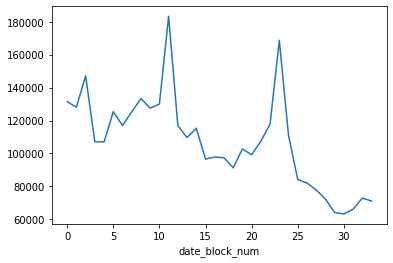

In [19]:
sales_by_month = df_tr_data.groupby(['date_block_num'])['item_cnt_day'].sum()
sales_by_month.plot()

<AxesSubplot:xlabel='date_block_num'>

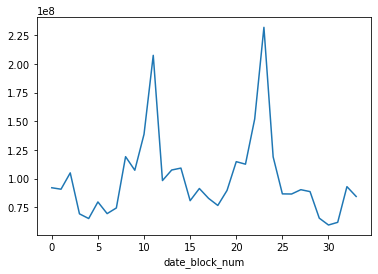

In [20]:
sales_by_months = df_tr_data.groupby(['date_block_num'])['revenue'].sum()
sales_by_months.plot()

In [21]:
df_tr_data.groupby(['year', 'item_category_name']).size()

year  item_category_name             
2013  Accessories - PS2                      2
      Accessories - PS3                  10521
      Accessories - PS4                   4653
      Accessories - PSP                   1814
      Accessories - PSVita                4195
                                         ...  
2015  Programs - Educational (figure)      640
      System Tools                        4368
      Tickets (digits)                     509
      Utilities - Tickets                 1325
      batteries                           2202
Length: 216, dtype: int64

In [22]:
# Top catogieries for the sold items

#df_tr_data.groupby('year').item_category_name.value_counts()
df_tr_data[df_tr_data['year']==2013].item_category_name.value_counts()

Movie - DVD                       287748
Games PC - Standard Edition       176485
Music - CD of local production    150684
Games - PS3                       101100
Movie - Blu-Ray                    81777
                                   ...  
Books - Travel Guides                  3
PC - Headsets / Headphones             3
Accessories - PS2                      2
Books - Fiction                        2
Game consoles - PS2                    1
Name: item_category_name, Length: 70, dtype: int64

In [ ]:
#plt.plot(MONTHS, dfp[dfp.year==2013].item_cnt_month, '-o', color='steelblue', linewidth=LINEWIDTH, alpha=ALPHA,label='2013')

<AxesSubplot:xlabel='MONTH', ylabel='item_cnt_day'>

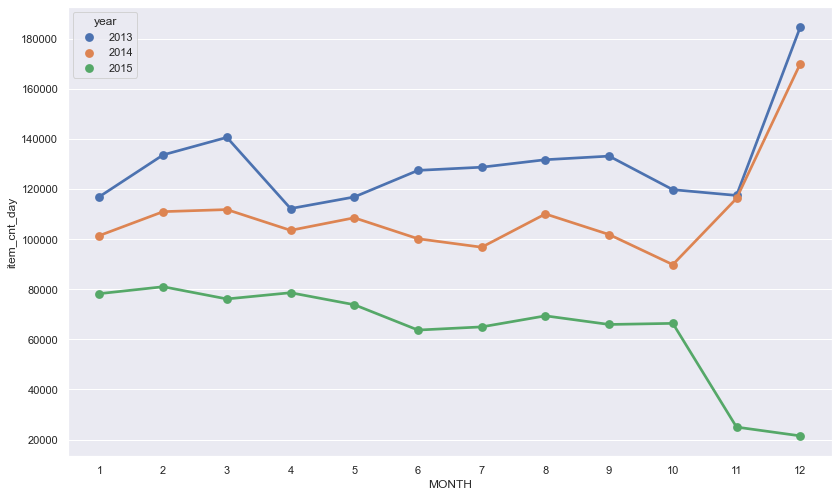

In [23]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
#month_ = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
sns.pointplot(data=df_tr_data.groupby(['MONTH', 'year'])['item_cnt_day'].sum().reset_index(), x='MONTH', y='item_cnt_day', hue='year')

#plt.title('Sales per month',fontsize=25)
#plt.ylabel('# of Items',fontsize=20)
#plt.xlabel('Month',fontsize=20)
#plt.tick_params(labelsize=13)

<AxesSubplot:xlabel='MONTH', ylabel='item_price'>

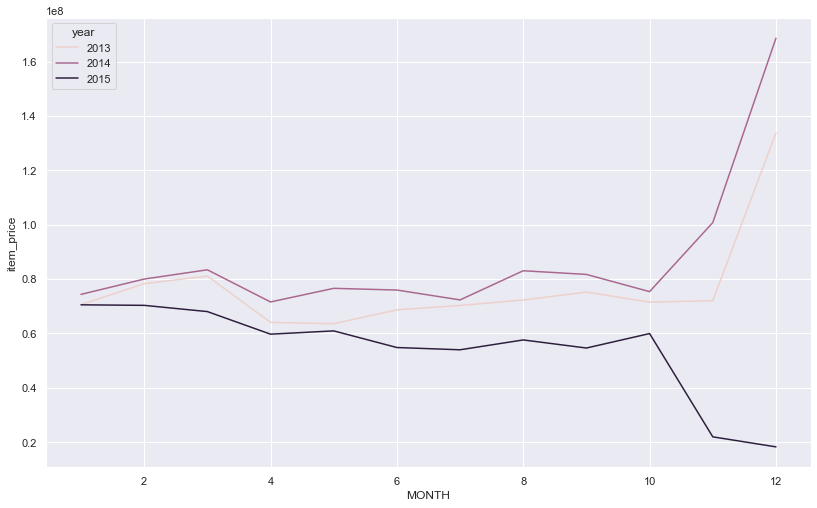

In [26]:
df1 = df_tr_data.groupby(['MONTH', 'year']).item_price.sum().reset_index()
sns.lineplot(data=df1, x='MONTH', y='item_price', hue='year', sort=False)